In [1]:
#Importing the Essential libraries and their Functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import gensim
import nltk
import re

In [2]:
import gensim.downloader as api
from gensim.models import word2vec
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv("C:/Users/HP/Desktop/LinkedIn/Apziva/Projects/Potential Talents/potential-talents.csv")

data

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN


# Feature Engineering

#EDA

In [5]:
data.head(20)

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
5,6.0,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN
6,7.0,Student at Humber College and Aspiring Human R...,Kanada,61,NaN
7,8.0,HR Senior Specialist,San Francisco Bay Area,500+,NaN
8,9.0,Student at Humber College and Aspiring Human R...,Kanada,61,NaN
9,10.0,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+,NaN


In [6]:
data.tail(20)

,id,job_title,location,connection,fit
979,NaN,NaN,NaN,NaN,NaN
980,NaN,NaN,NaN,NaN,NaN
981,NaN,NaN,NaN,NaN,NaN
982,NaN,NaN,NaN,NaN,NaN
983,NaN,NaN,NaN,NaN,NaN
984,NaN,NaN,NaN,NaN,NaN
985,NaN,NaN,NaN,NaN,NaN
986,NaN,NaN,NaN,NaN,NaN
987,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    float64
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 39.1+ KB


In [8]:
data.isnull()

,id,job_title,location,connection,fit
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
994,True,True,True,True,True
995,True,True,True,True,True
996,True,True,True,True,True
997,True,True,True,True,True


In [9]:
data.isnull().sum()

id            895
job_title     895
location      895
connection    895
fit           999
dtype: int64

In [10]:
data.describe()

,id,fit
count,104.000000,0.0
mean,52.500000,NaN
std,30.166206,NaN
min,1.000000,NaN
25%,26.750000,NaN
50%,52.500000,NaN
75%,78.250000,NaN
max,104.000000,NaN


In [11]:
data.count()

id            104
job_title     104
location      104
connection    104
fit             0
dtype: int64

In [12]:
data.dtypes.value_counts()

object     3
float64    2
dtype: int64

In [13]:
data.drop(['id'], axis=1, inplace=True)

data

,job_title,location,connection,fit
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...
994,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN


#Removing the Missing Values

In [14]:
data_3 = data.copy()

data_3

,job_title,location,connection,fit
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...
994,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN


In [15]:
data_3.drop(['fit'], axis=1, inplace=True)

In [16]:
data_3.dropna(subset=['job_title'], inplace=True)

data_3

,job_title,location,connection
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,People Development Coordinator at Ryan,"Denton, Texas",500+
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+
...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103
100,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+
101,Business Intelligence and Analytics at Travelers,Greater New York City Area,49
102,Always set them up for Success,Greater Los Angeles Area,500+


In [17]:
data_3.isnull().sum()

job_title     0
location      0
connection    0
dtype: int64

In [18]:
data_3.head()

,job_title,location,connection
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,People Development Coordinator at Ryan,"Denton, Texas",500+
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+


In [19]:
data_3.tail()

,job_title,location,connection
99,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103
100,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+
101,Business Intelligence and Analytics at Travelers,Greater New York City Area,49
102,Always set them up for Success,Greater Los Angeles Area,500+
103,Director Of Administration at Excellence Logging,"Katy, Texas",500+


In [20]:
data_3.drop(['location'], axis=1, inplace=True)

data_3

,job_title,connection
0,2019 C.T. Bauer College of Business Graduate (...,85
1,Native English Teacher at EPIK (English Progra...,500+
2,Aspiring Human Resources Professional,44
3,People Development Coordinator at Ryan,500+
4,Advisory Board Member at Celal Bayar University,500+
...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103
100,Human Resources Generalist at Loparex,500+
101,Business Intelligence and Analytics at Travelers,49
102,Always set them up for Success,500+


In [21]:
data_3['connection'].unique()

array(['85', '500+ ', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [22]:
# Load Pretrained Word2Vec Model (Google News)
word2vec_model = api.load("word2vec-google-news-300")  # 300D embeddings

# Function to clean and tokenize text
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    return [word for word in tokens if word in word2vec_model]  # Keep only known words

# Function to get sentence vector by averaging word vectors
def sentence_to_vector(sentence, model):
    words = preprocess_text(sentence)
    if not words:
        return np.zeros(model.vector_size)  # Return zero vector if no valid words
    return np.mean([model[word] for word in words], axis=0)

# Apply word2vec to each sentence in the column
data_3['job_title_embedding'] = data_3['job_title'].apply(lambda x: sentence_to_vector(x, word2vec_model))

# Display results
print(data_3[['job_title', 'job_title_embedding']])

                                             job_title  \
0    2019 C.T. Bauer College of Business Graduate (...   
1    Native English Teacher at EPIK (English Progra...   
2                Aspiring Human Resources Professional   
3               People Development Coordinator at Ryan   
4      Advisory Board Member at Celal Bayar University   
..                                                 ...   
99   Aspiring Human Resources Manager | Graduating ...   
100              Human Resources Generalist at Loparex   
101   Business Intelligence and Analytics at Travelers   
102                     Always set them up for Success   
103   Director Of Administration at Excellence Logging   

                                   job_title_embedding  
0    [-0.087259926, 0.08513387, 0.00034077963, 0.13...  
1    [0.013793945, 0.0234375, 0.06796265, 0.0773315...  
2    [-0.09277344, 0.037231445, 0.08280945, 0.02981...  
3    [-0.052111816, 0.03034668, 0.050097656, 0.1195...  
4    [-0.053027343

In [23]:
w1 = sentence_to_vector('Aspiring human resources', word2vec_model)

In [24]:
data_3['cosine_similarity'] = data_3['job_title_embedding'].apply(lambda x: cosine_similarity([w1], [x])[0][0])

data_3['cosine_similarity']

0      0.569894
1      0.231336
2      0.945019
3      0.295267
4      0.218546
         ...   
99     0.771218
100    0.747326
101    0.293233
102    0.243750
103    0.245439
Name: cosine_similarity, Length: 104, dtype: float64

In [25]:
data_3

,job_title,connection,job_title_embedding,cosine_similarity
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,Native English Teacher at EPIK (English Progra...,500+,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,People Development Coordinator at Ryan,500+,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,Advisory Board Member at Celal Bayar University,500+,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,Human Resources Generalist at Loparex,500+,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,Always set them up for Success,500+,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


#Labeling

In [28]:
labeled_data = data_3.copy()

labeled_data

,job_title,connection,job_title_embedding,cosine_similarity
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,Native English Teacher at EPIK (English Progra...,500+,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,People Development Coordinator at Ryan,500+,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,Advisory Board Member at Celal Bayar University,500+,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,Human Resources Generalist at Loparex,500+,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,Always set them up for Success,500+,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


In [29]:
labeled_data.drop(['job_title'], axis=1, inplace=True)

In [30]:
labeled_data = labeled_data[['job_title_embedding', 'cosine_similarity', 'connection']]

labeled_data

,job_title_embedding,cosine_similarity,connection
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,85
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,500+
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,44
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,500+
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,500+
...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,103
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,500+
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,49
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,500+


In [33]:
data_4 = data_3.copy()

#Converting ('500+ ') to (500) for Connection Column

In [34]:
data_4['connection'] = data_3['connection'].replace(['500+ '], [500], inplace=True)

data_4['connection']

0      None
1      None
2      None
3      None
4      None
       ... 
99     None
100    None
101    None
102    None
103    None
Name: connection, Length: 104, dtype: object

In [35]:
data_3['connectionn'] = data_3['connection'].astype(int)

data_3['connectionn']

0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connectionn, Length: 104, dtype: int32

In [36]:
data_3['connectionn'].unique()

array([ 85, 500,  44,   1,  61,   2, 390,  57,  82,   5,   7,  16, 212,
       409,  52, 455, 174, 268,  50,   4,  40,  18, 349, 155,  39,  64,
         9, 415,  19,  71,  48, 103,  49])

In [37]:
data_3

,job_title,connection,job_title_embedding,cosine_similarity,connectionn
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,85
1,Native English Teacher at EPIK (English Progra...,500,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,500
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,44
3,People Development Coordinator at Ryan,500,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,500
4,Advisory Board Member at Celal Bayar University,500,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,500
...,...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,103
100,Human Resources Generalist at Loparex,500,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,500
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,49
102,Always set them up for Success,500,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,500


In [38]:
data_3['connection'] = data_3['connectionn']

data_3['connection']

0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connection, Length: 104, dtype: int32

In [39]:
data_3.drop(['connectionn'], axis=1, inplace=True)

data_3

,job_title,connection,job_title_embedding,cosine_similarity
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,Native English Teacher at EPIK (English Progra...,500,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,People Development Coordinator at Ryan,500,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,Advisory Board Member at Celal Bayar University,500,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,Human Resources Generalist at Loparex,500,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,Always set them up for Success,500,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


#Feature Scaling 

In [43]:
labeled_data_2 = data_3.copy()

labeled_data_2

,job_title,connection,job_title_embedding,cosine_similarity
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,Native English Teacher at EPIK (English Progra...,500,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,People Development Coordinator at Ryan,500,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,Advisory Board Member at Celal Bayar University,500,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,Human Resources Generalist at Loparex,500,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,Always set them up for Success,500,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


In [44]:
labeled_data_2.drop(['job_title', 'job_title_embedding', 'cosine_similarity'], axis=1, inplace=True)

labeled_data_2

,connection
0,85
1,500
2,44
3,500
4,500
...,...
99,103
100,500
101,49
102,500


In [46]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(labeled_data_2)
labeled_data_2['scaled_connection'] = pd.DataFrame(scaled_data, columns=labeled_data_2.columns)

labeled_data_2['scaled_connection']

0      0.168337
1      1.000000
2      0.086172
3      1.000000
4      1.000000
         ...   
99     0.204409
100    1.000000
101    0.096192
102    1.000000
103    1.000000
Name: scaled_connection, Length: 104, dtype: float64

In [47]:
labeled_data_2

,connection,scaled_connection
0,85,0.168337
1,500,1.000000
2,44,0.086172
3,500,1.000000
4,500,1.000000
...,...,...
99,103,0.204409
100,500,1.000000
101,49,0.096192
102,500,1.000000


In [48]:
ranked_data = labeled_data_2.copy()

ranked_data

,connection,scaled_connection
0,85,0.168337
1,500,1.000000
2,44,0.086172
3,500,1.000000
4,500,1.000000
...,...,...
99,103,0.204409
100,500,1.000000
101,49,0.096192
102,500,1.000000


In [49]:
ranked_data['job_title'] = labeled_data['job_title_embedding']

ranked_data

,connection,scaled_connection,job_title
0,85,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13..."
1,500,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315..."
2,44,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981..."
3,500,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195..."
4,500,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054..."
...,...,...,...
99,103,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730..."
100,500,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632..."
101,49,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066..."
102,500,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985..."


In [50]:
ranked_data['cosine similarity'] = labeled_data['cosine_similarity']

ranked_data

,connection,scaled_connection,job_title,cosine similarity
0,85,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,500,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,44,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,500,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,500,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...,...
99,103,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,500,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,49,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,500,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


In [51]:
#In case of CopyWarning issues

In [52]:
ranked_data['cosine_similarity'] = ranked_data['cosine similarity']

ranked_data

,connection,scaled_connection,job_title,cosine similarity,cosine_similarity
0,85,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,0.569894
1,500,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,0.231336
2,44,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,0.945019
3,500,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,0.295267
4,500,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,0.218546
...,...,...,...,...,...
99,103,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,0.771218
100,500,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,0.747326
101,49,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,0.293233
102,500,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,0.243750


In [53]:
ranked_data.drop(['cosine similarity', 'connection'], axis=1, inplace=True)

ranked_data

,scaled_connection,job_title,cosine_similarity
0,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...
99,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


In [54]:
ranked_data = ranked_data[['job_title', 'cosine_similarity', 'scaled_connection']]

ranked_data

,job_title,cosine_similarity,scaled_connection
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,0.168337
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,1.000000
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,0.086172
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,1.000000
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,1.000000
...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,0.204409
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,1.000000
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,0.096192
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,1.000000


#Ranking

In [55]:
ranked_data['ranking'] = 0.75 * ranked_data['cosine_similarity'] + 0.25 * ranked_data['scaled_connection']

ranked_data['ranking']

<ipython-input-55-d423ed477ec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranked_data['ranking'] = 0.75 * ranked_data['cosine_similarity'] + 0.25 * ranked_data['scaled_connection']


0      0.469504
1      0.423502
2      0.730308
3      0.471450
4      0.413909
         ...   
99     0.629516
100    0.810494
101    0.243973
102    0.432812
103    0.434079
Name: ranking, Length: 104, dtype: float64

In [56]:
ranked_data

,job_title,cosine_similarity,scaled_connection,ranking
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,0.168337,0.469504
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,1.000000,0.423502
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,0.086172,0.730308
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,1.000000,0.471450
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,1.000000,0.413909
...,...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,0.204409,0.629516
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,1.000000,0.810494
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,0.096192,0.243973
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,1.000000,0.432812


#Sorting (Desecending)

In [57]:
ranked_data = ranked_data.sort_values(by='ranking', ascending=False)

ranked_data['ranking']

28     0.820254
26     0.820254
77     0.810494
100    0.810494
66     0.783760
         ...   
40     0.184341
10     0.184341
53     0.184341
62     0.184341
97     0.168163
Name: ranking, Length: 104, dtype: float64

In [58]:
ranked_data

,job_title,cosine_similarity,scaled_connection,ranking
28,"[-0.05757141, 0.07199097, 0.0112838745, -0.010...",0.760338,1.000000,0.820254
26,"[-0.05757141, 0.07199097, 0.0112838745, -0.010...",0.760338,1.000000,0.820254
77,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,1.000000,0.810494
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,1.000000,0.810494
66,"[-0.1373047, 0.10473633, 0.15371093, 0.1291259...",0.711680,1.000000,0.783760
...,...,...,...,...
40,"[-0.05621338, -0.015106201, 0.101257324, 0.194...",0.245120,0.002004,0.184341
10,"[-0.05621338, -0.015106201, 0.101257324, 0.194...",0.245120,0.002004,0.184341
53,"[-0.05621338, -0.015106201, 0.101257324, 0.194...",0.245120,0.002004,0.184341
62,"[-0.05621338, -0.015106201, 0.101257324, 0.194...",0.245120,0.002004,0.184341


#Correlation Coefficient

In [59]:
ranked_data.corr()

,cosine_similarity,scaled_connection,ranking
cosine_similarity,1.000000,-0.401710,0.825722
scaled_connection,-0.401710,1.000000,0.184862
ranking,0.825722,0.184862,1.000000


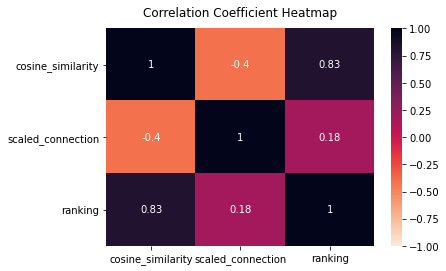

In [60]:
heatmap = sns.heatmap(ranked_data.corr(), vmin=-1, vmax=1, annot=True,cmap="rocket_r")

heatmap.set_title('Correlation Coefficient Heatmap', fontdict={'fontsize':12}, pad=12);

# Building the Model

#Ranking Models

In [61]:
#LambdaMart